In [1]:
from blackthorn import RhNeutrinoGeV, RhNeutrinoMeV, RhNeutrinoTeV, Gen
from blackthorn.rh_neutrino import RhNeutrinoGeVCpp

import matplotlib.pyplot as plt
import numpy as np


MeV = 1e-3
keV = 1e-6

In [2]:
model = RhNeutrinoGeV(200.0, 1e-3, Gen.Fst)
xs = np.geomspace(1e-4, 1.0, 100)
v_h = model.dndx_v_h(xs)
v_z = model.dndx_v_z(xs)
l_w = model.dndx_l_w(xs)
v_u_u = model.dndx_v_u_u(xs, Gen.Fst)

TypeError: unsupported operand type(s) for *: 'float' and 'Spectrum'

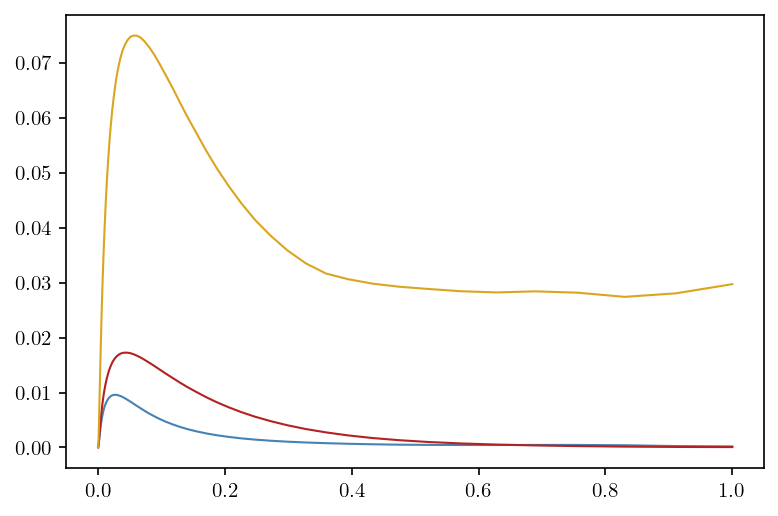

In [3]:
model = RhNeutrinoGeV(200.0, 1e-3, Gen.Fst)

xs = np.geomspace(1e-4, 1.0, 100)
dndx = model.dndx_photon(xs)
dndx_comps = model.dndx_photon_components(xs)

plt.figure(dpi=150)

for key, val in dndx_comps.items():
    plt.plot(xs, xs**2 * val, label=key, lw=1)

plt.plot(xs, xs**2 * dndx, label="Total", c="k")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc=1, bbox_to_anchor=(1.5,1))
plt.xlim(xs[0], xs[-1])
plt.tight_layout()

In [4]:
model = RhNeutrinoGeV(50.0, 1e-3, Gen.Fst)
xs = np.geomspace(1e-4, 1.0, 100)

dndx_comps = model.dndx_photon_components(xs)
dndx = model.dndx_photon(xs)

/home/logan/.local/lib/python3.10/site-packages/blackthorn/__init__.py:432: RuntimeWarning: invalid value encountered in log10
  idxs_ = np.argwhere(self._logms > np.log10(m))


TypeError: unsupported operand type(s) for *: 'float' and 'Spectrum'

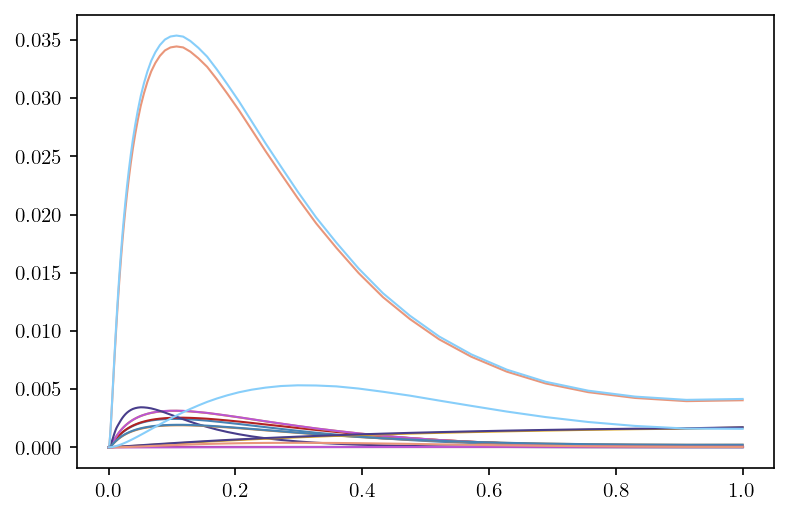

In [5]:
plt.figure(dpi=150)

for key, val in dndx_comps.items():
    plt.plot(xs, xs**2 * val, label=key, lw=1)

plt.plot(xs, xs**2 * dndx, label="Total", c="k")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc=1, bbox_to_anchor=(1.5,1))
plt.xlim(xs[0], xs[-1])
plt.tight_layout()

## MeV Scale Spectra

In [6]:
mx = 1.0
xs = np.geomspace(1e-6, 1.0, 200)
eps = 0.1

mns = [10 * keV, 2 * MeV, 10 * MeV, 100 * MeV, 150 * MeV, 250 * MeV]
dndxs = []
for mn in mns:
    model = RhNeutrinoMeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    if mn == mx/2.0:
        dndxs.append(model.dndx_photon(xs).convolve(eps)(xs))
    else:
        dndxs.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

                                                            
         *******************************************        
         *              C O L L I E R              *        
         *                                         *        
         *        Complex One-Loop Library         *        
         *      In Extended Regularizations        *        
         *                                         *        
         *    by A.Denner, S.Dittmaier, L.Hofer    *        
         *                                         *        
         *              version 1.2.5              *        
         *                                         *        
         *******************************************        
                                                            


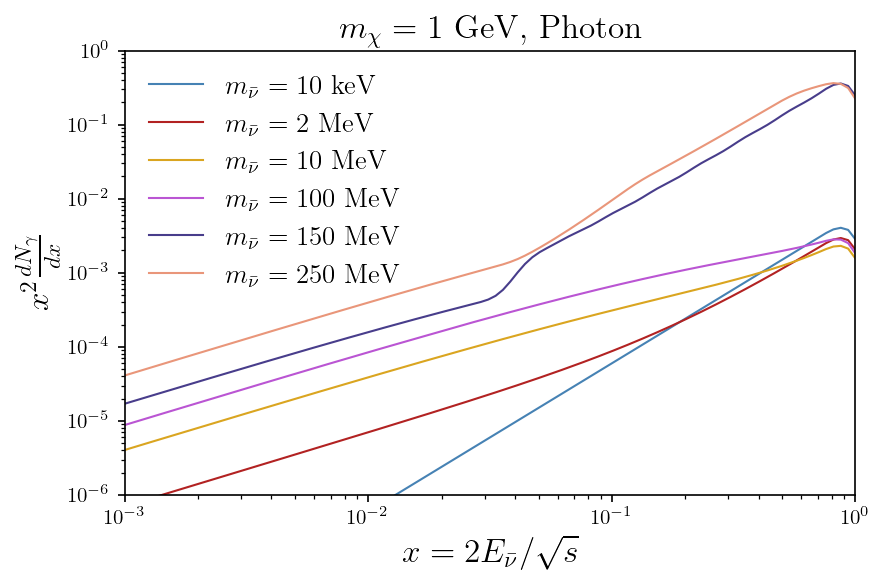

In [7]:
plt.figure(dpi=150)

labels = [
    r"$m_{\bar{\nu}} = 10 \ \mathrm{keV}$",
    r"$m_{\bar{\nu}} = 2 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 10 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 100 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 150 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 250 \ \mathrm{MeV}$",
]

for mn, dndx, label in zip(mns, dndxs, labels):
    plt.plot(xs, xs**2 * dndx, label=label, lw=1)

plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-3,1.0)
plt.ylim(1e-6,1.0)
plt.legend(frameon=False, fontsize=13)
plt.title(r"$m_{\chi} = 1 \ \mathrm{GeV}$, Photon", fontsize=16)
plt.ylabel(r"$x^2\frac{dN_{\gamma}}{dx}$", fontdict={"size":16})
plt.xlabel(r"$x = 2E_{\bar{\nu}}/\sqrt{s}$", fontdict={"size":16})
plt.tight_layout()
plt.savefig("./figures/spec_1gev.pdf")

## High Energy Spectra

In [7]:
from blackthorn import RhNeutrinoGeV, RhNeutrinoTeV, RhNeutrinoMeV, Gen
import matplotlib.pyplot as plt
import numpy as np

In [13]:

mx = 1e8
xs = np.geomspace(1e-6, 1.0, 200)
eps = 0.1

# mns_tev = [1e3, 1e4, 1e5, 1e6, 1e7]
mns_tev = [1e3, 1e5, 1e7]
dndxs_tev = []
for mn in mns_tev:
    model = RhNeutrinoTeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_tev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

mns_gev = [10.0, 50.0, 300.0]
dndxs_gev = []
for mn in mns_gev:
    model = RhNeutrinoGeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_gev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))


/home/logan/.local/lib/python3.10/site-packages/blackthorn/__init__.py:432: RuntimeWarning: invalid value encountered in log10
  idxs_ = np.argwhere(self._logms > np.log10(m))


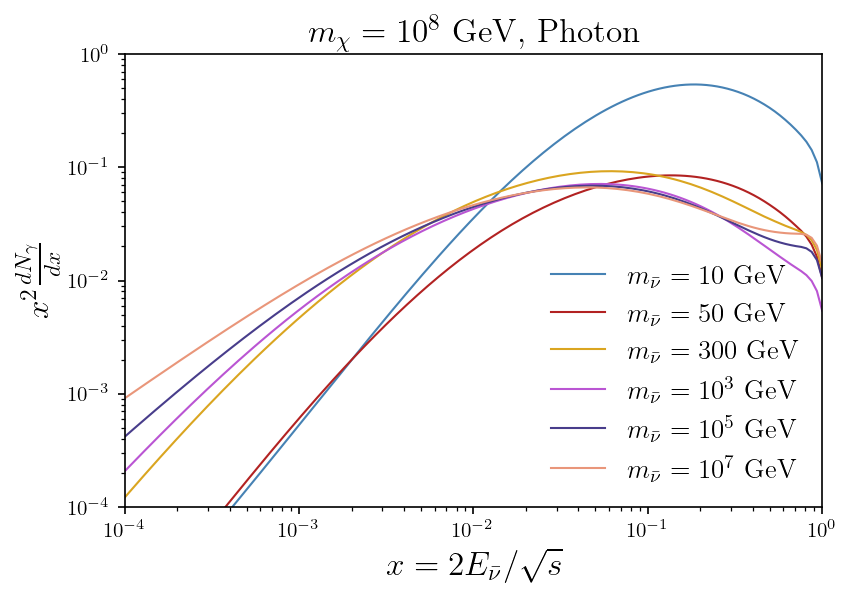

In [15]:
plt.figure(dpi=150)


labels = [
    r"$m_{\bar{\nu}} = 10 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 50 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 300 \ \mathrm{GeV}$",
]

for mn, dndx, label in zip(mns_gev, dndxs_gev, labels):
    plt.plot(xs, xs**2 * dndx , label=label, lw=1)

labels = [
    r"$m_{\bar{\nu}} = 10^{3} \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 10^{5} \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 10^{7} \ \mathrm{GeV}$",
]

for mn, dndx, label in zip(mns_tev, dndxs_tev, labels):
    plt.plot(xs, xs**2 * dndx, label=label,lw=1)

plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-4,1.0)
plt.ylim(1e-4,1)
plt.title(r"$m_{\chi} = 10^{8} \ \mathrm{GeV}$, Photon", fontsize=16)
plt.ylabel(r"$x^2\frac{dN_{\gamma}}{dx}$", fontdict={"size":16})
plt.xlabel(r"$x = 2E_{\bar{\nu}}/\sqrt{s}$", fontdict={"size":16})
plt.legend(loc=4, frameon=False, fontsize=13)
plt.savefig("./figures/spec_1e8gev.pdf")

In [32]:
MeV = 1e-3
keV = 1e-6

mx = 1e3
xs = np.geomspace(1e-6, 1.0, 200)
eps = 0.1

mns_gev = [50.0, 150.0, 500.0]
dndxs_gev = []
for mn in mns_gev:
    model = RhNeutrinoGeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_gev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

mns_mev = [10 * keV, 100 * MeV, 500 * MeV]
dndxs_mev = []
for mn in mns_mev:
    model = RhNeutrinoMeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_mev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

/home/logan/.local/lib/python3.10/site-packages/blackthorn/__init__.py:432: RuntimeWarning: invalid value encountered in log10
  idxs_ = np.argwhere(self._logms > np.log10(m))


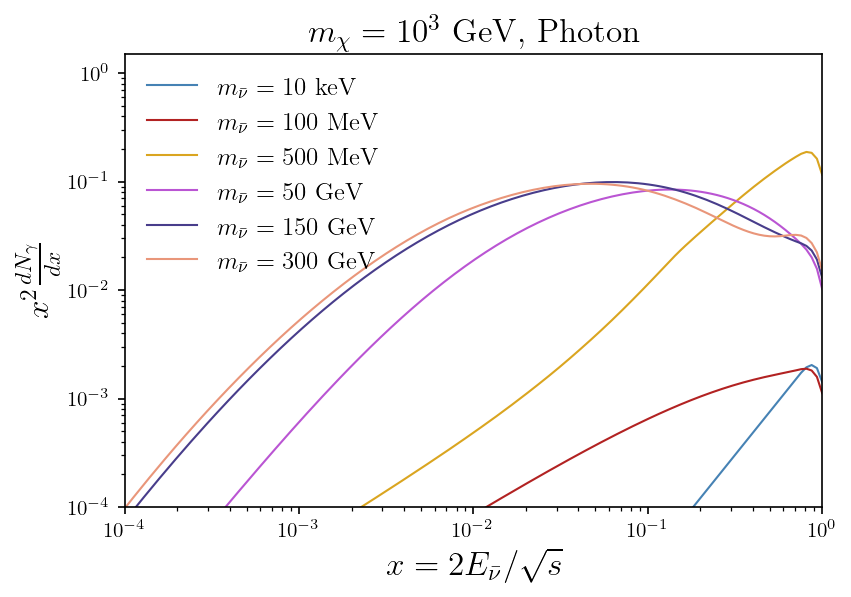

In [33]:

plt.figure(dpi=150)

labels = [
    r"$m_{\bar{\nu}} = 10 \ \mathrm{keV}$",
    r"$m_{\bar{\nu}} = 100 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 500 \ \mathrm{MeV}$",
]

for mn, dndx, label in zip(mns_mev, dndxs_mev, labels):
    plt.plot(xs, xs**2 * dndx, label=label,lw=1)

labels = [
    r"$m_{\bar{\nu}} = 50 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 150 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 300 \ \mathrm{GeV}$",
]

for mn, dndx, label in zip(mns_gev, dndxs_gev, labels):
    plt.plot(xs, xs**2 * dndx , label=label, lw=1)


plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-4,1.0)
plt.ylim(1e-4,1.5)
plt.title(r"$m_{\chi} = 10^{3} \ \mathrm{GeV}$, Photon", fontsize=16)
plt.ylabel(r"$x^2\frac{dN_{\gamma}}{dx}$", fontdict={"size":16})
plt.xlabel(r"$x = 2E_{\bar{\nu}}/\sqrt{s}$", fontdict={"size":16})
plt.legend(loc=2, frameon=False, fontsize=12)
plt.savefig("./figures/spec_1e3gev.pdf")

In [27]:
xs = np.geomspace(1e-5, 1.0, 100)
dndx_tev1 = RhNeutrinoTeV(1e3, 1e-3, Gen.Fst).dndx_photon(xs)
dndx_tev2 = RhNeutrinoTeV(1e4, 1e-3, Gen.Fst).dndx_photon(xs)
dndx_tev3 = RhNeutrinoTeV(1e5, 1e-3, Gen.Fst).dndx_photon(xs)
dndx_gev1 = RhNeutrinoGeV(1e3, 1e-3, Gen.Fst).dndx_photon(xs)
dndx_gev2 = RhNeutrinoGeV(1e4, 1e-3, Gen.Fst).dndx_photon(xs)
dndx_gev3 = RhNeutrinoGeV(1e5, 1e-3, Gen.Fst).dndx_photon(xs)

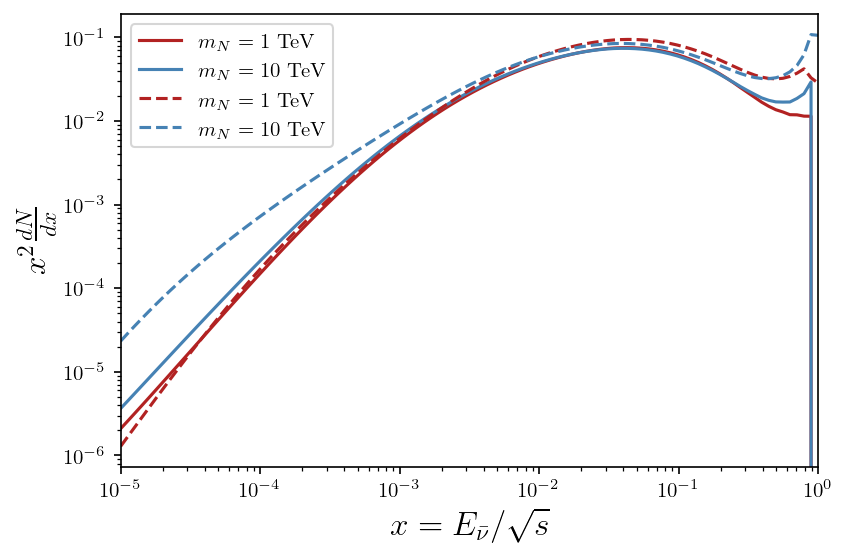

In [28]:
plt.figure(dpi=150)


plt.plot(xs, xs**2 * dndx_tev1.dndxs, label=r"$m_{N} = 1 \ \mathrm{TeV}$", c="firebrick")
plt.plot(xs, xs**2 * dndx_tev2.dndxs, label=r"$m_{N} = 10 \ \mathrm{TeV}$", c="steelblue")
plt.plot(xs, xs**2 * dndx_gev1.dndxs, label=r"$m_{N} = 1 \ \mathrm{TeV}$", c="firebrick",ls="--")
plt.plot(xs, xs**2 * dndx_gev2.dndxs, label=r"$m_{N} = 10 \ \mathrm{TeV}$", c="steelblue",ls="--")

plt.yscale("log")
plt.xscale("log")
plt.xlim(xs[0], xs[-1])
# plt.title(r"$m_{\chi} = 1 \ \mathrm{GeV}$", fontsize=16)
plt.ylabel(r"$x^2\frac{dN}{dx}$", fontdict={"size":16})
plt.xlabel(r"$x = E_{\bar{\nu}}/\sqrt{s}$", fontdict={"size":16})
plt.legend()

In [10]:
MeV = 1e-3
keV = 1e-6

mx = 1e2
xs = np.geomspace(1e-6, 1.0, 200)
eps = 0.1

mns_gev = [5.0, 10.0, 50.0]
dndxs_gev = []
for mn in mns_gev:
    model = RhNeutrinoGeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_gev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

mns_mev = [10 * keV, 100 * MeV, 500 * MeV]
dndxs_mev = []
for mn in mns_mev:
    model = RhNeutrinoMeV(mn, 1e-3, Gen.Fst)
    beta = np.sqrt(1.0 - (2 * mn / mx)**2)
    dndxs_mev.append(model.dndx_photon(xs).boost(beta).convolve(eps)(xs))

/home/logan/.local/lib/python3.10/site-packages/blackthorn/__init__.py:432: RuntimeWarning: invalid value encountered in log10
  idxs_ = np.argwhere(self._logms > np.log10(m))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


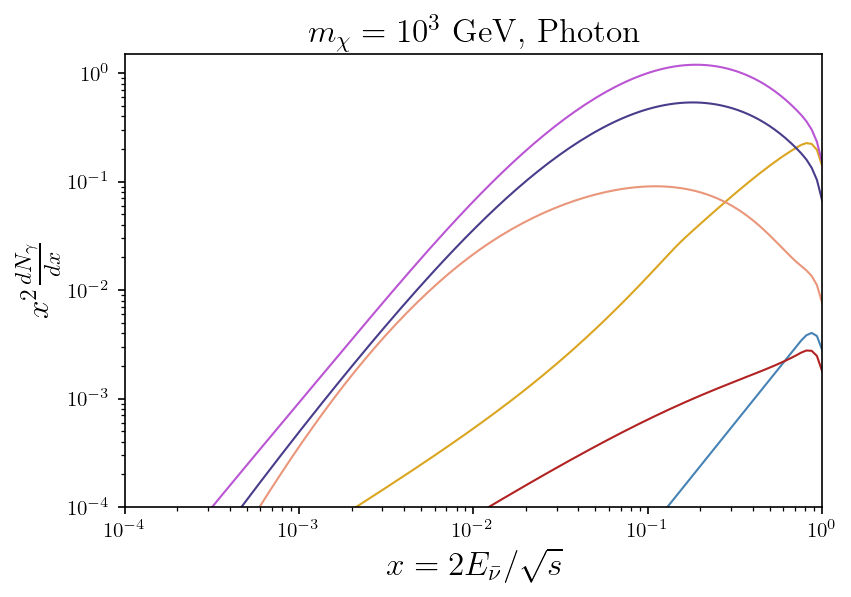

In [11]:

plt.figure(dpi=150)

labels = [
    r"$m_{\bar{\nu}} = 10 \ \mathrm{keV}$",
    r"$m_{\bar{\nu}} = 100 \ \mathrm{MeV}$",
    r"$m_{\bar{\nu}} = 500 \ \mathrm{MeV}$",
]

for mn, dndx, label in zip(mns_mev, dndxs_mev, labels):
    plt.plot(xs, xs**2 * dndx, lw=1)

labels = [
    r"$m_{\bar{\nu}} = 50 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 150 \ \mathrm{GeV}$",
    r"$m_{\bar{\nu}} = 300 \ \mathrm{GeV}$",
]

for mn, dndx, label in zip(mns_gev, dndxs_gev, labels):
    plt.plot(xs, xs**2 * dndx , lw=1)


plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-4,1.0)
plt.ylim(1e-4,1.5)
plt.title(r"$m_{\chi} = 10^{3} \ \mathrm{GeV}$, Photon", fontsize=16)
plt.ylabel(r"$x^2\frac{dN_{\gamma}}{dx}$", fontdict={"size":16})
plt.xlabel(r"$x = 2E_{\bar{\nu}}/\sqrt{s}$", fontdict={"size":16})
plt.legend(loc=2, frameon=False, fontsize=12)